In [1]:
###LINEAR REGRESSION

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Data Generation
def dataGenerate(m):
    #m = 100 #number of data values
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + noise
    return X,y


In [38]:
X,y=dataGenerate(100)
print(len(X))
print(X)
print(len(y))
print(y)

100
[ -9.57561781   3.54598874   3.706757   -21.30509122  -8.36397983
  -5.78567286   4.80476591   1.16629267  -8.47960834  11.71172524
 -11.99852995   0.902859    -2.02884844  18.50203263  -5.59221259
  -8.65553726   0.49879266  -5.90089268  -0.79657582   5.27716193
 -20.45551315 -11.66536108 -20.04512743  -6.15053515  -5.49008146
   5.17970851 -13.99482133  -7.05375722  -7.51879938  14.97718415
   4.33218235  -6.45690309  -0.44269799  -1.35983703  -4.61356609
   4.70164084   3.45639508 -15.20113766   7.56295185   3.89613562
   4.63284684   9.12249064  15.89712746   4.93994631  -7.00885742
   6.75077761  10.93075187 -18.92481388  -9.58903474  -4.03112177
  -1.77236623  -1.63438288  -6.93510839  -6.20185572  -6.34724935
  15.65165757  16.87667233  11.45833324   7.62884173 -13.17596654
  -7.52105244   6.01794228  -8.16617786   0.26736675   6.76588352
  -7.08402791   1.84759325 -15.52576937   3.01908734   8.56598441
  -8.07547072  -7.21233445 -10.37513272   3.03864947 -14.98606673
   9.6

In [39]:
#plotting data
def plotData(X,y,title):
    plt.title(title)
    plt.scatter(X,y)
    plt.show()


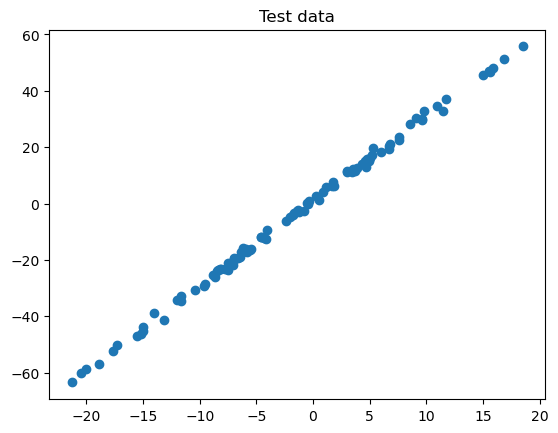

In [40]:
plotData(X,y,"Test data")

In [41]:
#Normalize/Standardize the data
def normalizeData(X):
    X = (X-X.mean())/X.std()
    return X

In [42]:
X=normalizeData(X)
print(X)

[-0.86474128  0.57938311  0.59707678 -2.1556517  -0.73139206 -0.44763139
  0.71792032  0.31748095 -0.74411779  1.47807941 -1.13139968  0.28848823
 -0.03416663  2.22540014 -0.42633973 -0.76347999  0.24401791 -0.46031213
  0.10145357  0.7699108  -2.06214971 -1.09473212 -2.01698389 -0.48778703
 -0.41509949  0.75918538 -1.35110548 -0.58719292 -0.63837406  1.83746596
  0.66590921 -0.52150496  0.14040029  0.03946274 -0.31863285  0.70657069
  0.5695227  -1.48386901  1.02147794  0.61791922  0.69899943  1.19311607
  1.93871214  0.73279787 -0.58225138  0.9320925   1.39212784 -1.89368557
 -0.86621791 -0.25453079 -0.00593898  0.00924705 -0.57413479 -0.49343521
 -0.5094368   1.91169647  2.04651789  1.45019185  1.02872958 -1.26098479
 -0.63862202  0.85143885 -0.70962258  0.21854788  0.93375501 -0.59052442
  0.39246283 -1.51959699  0.52139393  1.13186868 -0.69963962 -0.60464545
 -0.95273348  0.52354688 -1.46019895  1.25005867 -0.78622302  0.74286143
 -1.4629963  -1.71093996 -0.31786736 -1.75783186  0

In [43]:
#Train-Test split
def trainTestSplit(X,y,split=0.8):
    m=X.shape[0]
    #data--to split x and y together we are grouping them and shuffling 
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)
    split = int(split*m)
    Xtrain = data[:split,0]
    Xtest = data[split:,0]
    ytrain = data[:split,1]
    ytest = data[split:,1]
    return Xtrain,ytrain,Xtest,ytest
    

In [44]:
Xtrain,ytrain,Xtest,ytest= trainTestSplit(X,y)

In [45]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(80,)
(20,)
(80,)
(20,)


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

# Error function
def error(X, y, theta):
    m = X.shape[0]
    y_hat = hypothesis(X, theta)
    e = np.sum((y - y_hat) ** 2)
    return e / (2 * m)

# Gradient function
def gradient(X, y, theta):
    m = X.shape[0]
    y_hat = hypothesis(X, theta)
    grad = np.zeros(2)
    grad[0] = np.sum(y_hat - y)
    grad[1] = np.sum((y_hat - y) * X)
    return grad / m

# Training function
def train(X, y, learning_rate=0.1, maxItrs=100):
    theta = np.zeros(2)
    errors_list = []
    for i in range(maxItrs):
        grad = gradient(X, y, theta)
        errors_list.append(error(X, y, theta))
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
    return theta, errors_list

# Prediction function
def predict(X, theta):
    return hypothesis(X, theta)








In [58]:
theta, errors_list = train(Xtrain, ytrain)
print("Learned parameters:", theta)

Learned parameters: [-4.12997957 27.38184567]


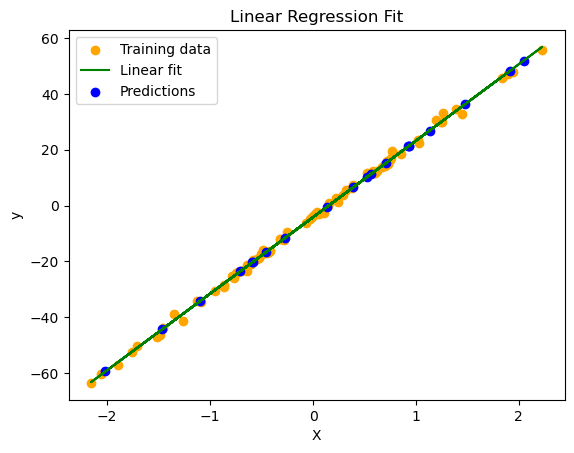

In [59]:
#predicitons
yp = predict(Xtest, theta)
# Plotting
plt.scatter(Xtrain, ytrain, color="orange", label="Training data")
plt.plot(Xtrain, hypothesis(Xtrain, theta), color="green", label="Linear fit")
plt.scatter(Xtest, yp, color="blue", label="Predictions")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()


In [60]:
def r2Score(y,yp):
    ymean = y.mean()
    numerator = np.sum((y-yp)**2)
    denominator = np.sum((y-ymean)**2)
    return 1- (numerator/denominator)

In [62]:
accuracy = r2Score(ytest,yp)*100
print(accuracy)

99.8490129795171


In [1]:
####LINEAR REGRESSION WITH MULTIPLE FEATURES

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [45]:
#Data Generation 
X,y =make_regression(n_samples=500,n_features=10,n_informative=6,noise=4.9,random_state=0)
n_features = 10
print(X.shape, y.shape)

(500, 10) (500,)


In [31]:
#Visualise 
pd.DataFrame(X).head()

0         1         2         3         4         5         6  \
0 -0.254962 -1.595063  0.859492 -0.741556  0.279689  0.956809  0.958888   
1 -1.616956  0.640132 -0.369182 -0.239379 -0.738031 -0.024326  1.099660   
2  0.093953 -0.130107  0.929505  0.582225 -2.739677  0.943046 -2.094603   
3  0.978730  1.589923 -0.975921  0.024130 -0.814709  0.934164  1.120464   
4 -0.766705  0.001471  0.192729  0.696439 -0.998192 -1.004323  0.338225   

          7         8         9  
0  0.281697  0.915603  1.898921  
1  0.279925 -0.098150  0.655264  
2 -0.569312  0.269904  0.123722  
3 -0.251242 -0.382835 -1.129877  
4 -1.373043 -1.067742  0.651781

In [32]:
#Normalise 
def Normalise(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-mean)/std

In [33]:
X = Normalise(X)


In [34]:
print(X.mean(axis=0),X.std(axis=0))

[-4.48530102e-17  6.94999613e-17  2.39808173e-17 -1.29687927e-17
 -5.05151476e-17 -2.40640841e-17  6.88338275e-18  1.33226763e-17
 -6.32827124e-18  1.60982339e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
print(X[:,1].shape,y.shape)

(500,) (500,)


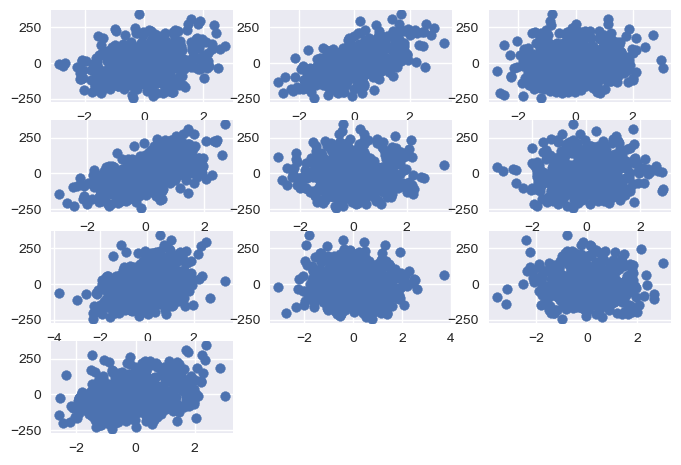

In [36]:
#visulaizing y as function each feature of X
for f in range(X.shape[1]):
    plt.subplot(4,3,f+1)
    plt.scatter(X[:,f],y)
plt.show()
    

In [42]:
#Train test split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=0)

In [43]:
pd.DataFrame(Xtrain).head()

0         1         2         3         4         5         6  \
0 -0.228687 -1.520600  0.959740 -0.828426  0.305836  1.022986  0.975067   
1 -1.612963  0.709920 -0.277540 -0.301827 -0.693297 -0.045695  1.116862   
2  0.125936 -0.058708  1.030243  0.559735 -2.658385  1.007996 -2.100631   
3  1.025187  1.657726 -0.888528 -0.025502 -0.768574  0.998321  1.137818   
4 -0.748802  0.072595  0.288307  0.679503 -0.948706 -1.113137  0.349891   

          7         8         9  
0  0.267708  0.879360  1.976828  
1  0.265971 -0.166048  0.714702  
2 -0.566372  0.213499  0.175267  
3 -0.254630 -0.459621 -1.096949  
4 -1.354115 -1.165914  0.711168

In [44]:
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(350, 10) (350,)
(150, 10) (150,)


In [48]:
#Pre process X 
def preprocess(X):
    if X.shape[1] == n_features :
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones,X))
    return X
        

In [49]:
Xtrain = preprocess(Xtrain)
Xtest = preprocess(Xtest)

In [50]:
print(Xtrain.shape,Xtest.shape)

(350, 11) (150, 11)


In [57]:
#MODELING

# 1. Hypothesis
def hypothesis(X,theta):
    return np.dot(X,theta)

# 2. Loss Function
def loss(X,y,theta):
    y_predicted = hypothesis(X,theta)
    error = np.mean((y_predicted - y)**2)
    return error

# 3. Gradient
def gradient(X,y,theta):
    y_predicted = hypothesis(X,theta)
    grad = np.dot(X.T,(y_predicted-y))
    m = X.shape[0]
    return grad/m

# 4. Training 
def train(X,y,learning_rate=0.1,max_Iters= 100):
    n = X.shape[1]
    err_list = []
    theta = np.random.randn(n)
    for  i in range(max_Iters):
        error = loss(X,y,theta)
        err_list.append(error)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
    plt.plot(err_list)
    plt.show()
    return theta

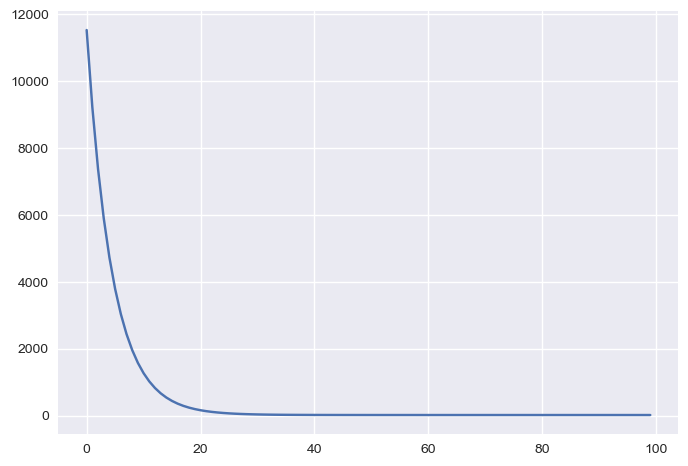

In [58]:
theta = train(Xtrain,ytrain)

In [61]:
print(theta.shape)
print(theta)

(11,)
[-4.94554350e+00  2.91407507e+01  6.06366445e+01  1.08387000e+01
  6.30372245e+01  2.02010884e-01  2.77494364e-02  4.11348123e+01
  3.33604675e-01 -3.03381321e-01  2.57247499e+01]


In [63]:
#Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    den = np.sum((y-ymean)**2)
    return  1 - (num/den)

In [65]:
yp = hypothesis(Xtest,theta)
print(yp.shape)


(150,)


In [67]:
r2Score(ytest,yp)

0.9974304430333643

In [70]:
##LINEAR REGRESSION USING SCIKIT LEARN
from sklearn.linear_model import LinearRegression


In [71]:
model = LinearRegression()


In [73]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [74]:
model.score(Xtest,ytest)

0.9974296143883143

In [75]:
model.intercept_

-4.946585670279591

In [81]:
model.coef_
print(model.coef_[1:].shape)

(10,)


In [84]:
theta = np.zeros((n_features+1,))
print(theta.shape)
theta[0] = model.intercept_
theta[1:] = model.coef_[1:] 
print(theta)

(11,)
[-4.94658567e+00  2.91418964e+01  6.06362878e+01  1.08412061e+01
  6.30408269e+01  1.99914639e-01  2.66634332e-02  4.11385034e+01
  3.35054091e-01 -3.07095201e-01  2.57225117e+01]
